# Clustering: Digits dataset

Scikit-learn includes the test set from  the NIST Optical Recognition of Handwritten Digits Data Set.
The data set may be used for classification, as the true class information is available.

We are, however, not going to use the target information here, except for informally comparing the unsupervised learning (clustering) results to the ground truth.

## Load and inspect the data

In [1]:
# the usual imports
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [4]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

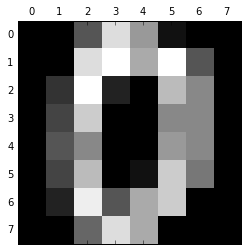

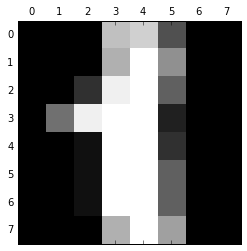

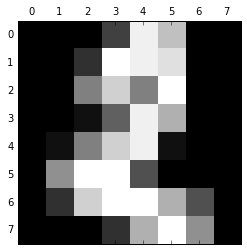

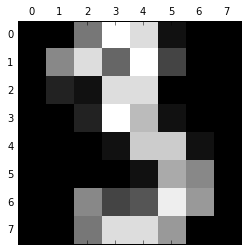

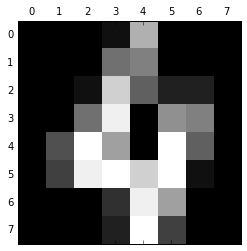

In [5]:
plt.gray() 
for i in range(5): plt.matshow(digits.images[i])

In [6]:
X = digits.data

# y contains the true classes, but we are not going to use them for learning
y = digits.target

## Zeros and Ones

First, let's look at 0s and 1s only, which should look rather different overall ;-)

In [7]:
# subset of data set containing 0s and 1s only
X01 = X[np.logical_or(y == 0, y==1)]
X01

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   1., ...,   3.,   0.,   0.],
       ..., 
       [  0.,   0.,   5., ...,   8.,   1.,   0.],
       [  0.,   0.,   6., ...,   4.,   0.,   0.],
       [  0.,   0.,   6., ...,   6.,   0.,   0.]])

In [8]:
# subset of true class data containing 0s and 1s only
y01 = y[np.logical_or(y == 0, y==1)]
y01

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0,

Before clustering, we will perform dimensionality reduction using PCA.

Looking at how much variance is explained by the various factors, how many factors would you chose to proceed with?

In [9]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X01)

pca.explained_variance_

array([  4.79043989e+02,   1.81139000e+02,   1.03642340e+02,
         5.35487643e+01,   3.75499717e+01,   3.39106455e+01,
         3.15711211e+01,   2.44161973e+01,   1.91053453e+01,
         1.59297237e+01,   1.34976139e+01,   1.18923333e+01,
         1.11616269e+01,   9.76056880e+00,   7.94871310e+00,
         6.47677172e+00,   6.15609144e+00,   5.97185011e+00,
         5.04824580e+00,   4.55773240e+00,   4.53512365e+00,
         4.20854489e+00,   3.55049504e+00,   3.45030000e+00,
         3.31441640e+00,   3.02631228e+00,   2.85857864e+00,
         2.49456218e+00,   2.31239111e+00,   2.18687999e+00,
         1.97049552e+00,   1.83170760e+00,   1.70083485e+00,
         1.62398814e+00,   1.48211902e+00,   1.34030707e+00,
         1.28496751e+00,   1.16579247e+00,   9.60835508e-01,
         8.48514109e-01,   7.97415422e-01,   7.00354510e-01,
         6.32218528e-01,   5.95857053e-01,   5.13810052e-01,
         4.76653162e-01,   3.96670358e-01,   3.91481160e-01,
         1.42947835e-02,

We want to plot the clusters in 2 dimensions, so (fully aware we are not going to make the "best" choice) we perform PCA with 2 components and proceed with the transformed data:

In [10]:
X01_reduced = decomposition.PCA(n_components=2).fit_transform(X01)
X01_reduced.shape

(360, 2)

Now perform k-means clustering on the transformed data.

We know we have 2 different digits, so we tell the algorithm we want 2 clusters:

In [11]:
from sklearn import cluster
kmeans01 = cluster.KMeans(n_clusters = 2, n_init = 20)
kmeans01.fit(X01_reduced)

kmeans01.cluster_centers_

array([[ 20.9692236 ,   1.34790884],
       [-20.9692236 ,  -1.34790884]])

Display cluster membership:

In [12]:
print('cluster membership: {}\n'.format(kmeans01.labels_))

cluster membership: [0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]



As we have the true classes, we can compare:

In [13]:
# If this produces all False, re-run from PCA above
y01 == kmeans01.labels_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Now plot the clusters in 2d.

In terms of the 2 principal compnonents, which digit is more homogeneous, 0 or 1?

In [14]:
cluster_1 = X01_reduced[kmeans01.labels_ == 0]
cluster_2 = X01_reduced[kmeans01.labels_ == 1]

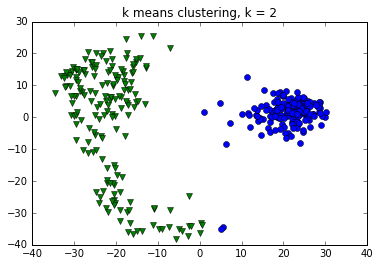

In [15]:
plt.figure()
plt.title('k means clustering, k = 2')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'bo')
plt.plot(cluster_2[:,0], cluster_2[:,1], 'gv')
plt.show()

## Sevens and Ones

Now, do the same with digits 1 and 7.

How well does the clustering separate the digits?

In [16]:
# subset of data set containing 7s and 1s only
X17 = X[np.logical_or(y == 7, y==1)]
X17

array([[  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   7., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   1.,   0.],
       ..., 
       [  0.,   0.,   6., ...,   0.,   0.,   0.],
       [  0.,   0.,   3., ...,   0.,   0.,   0.],
       [  0.,   1.,  10., ...,   0.,   0.,   0.]])

In [17]:
# subset of true class data containing 7s and 1s only
y17 = y[np.logical_or(y == 7, y==1)]
y17

array([1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1,
       7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1,
       7, 1, 1, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7,
       1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1,
       7, 1, 7, 1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1,
       7, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7,
       1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7,
       1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1,
       7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 1, 1, 7, 1, 1, 7, 7, 7, 1,
       7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7, 1, 1, 7,
       7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7, 1, 1, 7,
       1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1, 7, 1, 7,
       1, 1, 7, 1, 1, 7, 7, 7, 1, 7, 1, 7, 1, 7, 1, 7, 7, 1, 7, 1, 7, 1, 1,
       7, 1,

In [18]:
# reduce to 2 components
X17_reduced = decomposition.PCA(n_components=2).fit_transform(X17)

In [19]:
# cluster the reduced data
kmeans17 = cluster.KMeans(n_clusters = 2, n_init = 20)
kmeans17.fit(X17_reduced)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=20,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [20]:
# inspect cluster memberships
print('cluster membership: {}\n'.format(kmeans17.labels_))

cluster membership: [1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0
 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0]



In [25]:
y17_classes = np.where(y17 == 7, 1, 0)
# If this produces all False, re-run from PCA above
y17_classes == kmeans17.labels_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

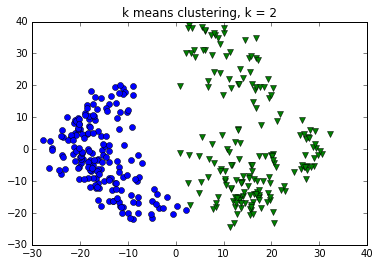

In [26]:
cluster_1 = X17_reduced[kmeans17.labels_ == 0]
cluster_2 = X17_reduced[kmeans17.labels_ == 1]
plt.figure()
plt.title('k means clustering, k = 2')
plt.plot(cluster_1[:,0], cluster_1[:,1], 'bo')
plt.plot(cluster_2[:,0], cluster_2[:,1], 'gv')
plt.show()

Finally, look at some evaluation metrics. Do they make sense?

In [23]:
# within cluster sum of squares
kmeans01.inertia_, kmeans17.inertia_

(78716.805118784105, 93642.939889941612)

In [24]:
# Silhouette score
# score = (b - a) / max(a,b)
#    a: The mean distance between a sample and all other points in the same class.
#    b: The mean distance between a sample and all other points in the next nearest cluster.

from sklearn import metrics
print('Silhouette score, 0 vs 1: {}'.format(metrics.silhouette_score(X01, kmeans01.labels_)))
print('Silhouette score, 1 vs 7: {}'.format(metrics.silhouette_score(X17, kmeans17.labels_)))

Silhouette score, 0 vs 1: 0.374692756553
Silhouette score, 1 vs 7: 0.225936096857
